In [12]:
!python -m pip install -U gensim nltk | grep -v 'already satisfied'

In [2]:
# Python imports
import gensim
from gensim.models import Word2Vec
from gensim.models.word2vec import FAST_VERSION
print(f"gensim FAST_VERSION = {FAST_VERSION}. <-- Hopefully that says '1' not '-1'")

from sklearn.manifold import TSNE   # actually TNSE is the speed bottleneck, not Word2Vec
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import nltk
import re
import codecs
import multiprocessing
import os
import sys
import matplotlib.patheffects as PathEffects
import tempfile
import imageio
import shutil

#  plot_type: 'notebook' allows for interactive plots (=better!), but Colab
#       only supports 'inline'.
#       For interactive plots, best to execute one cell at a time (manually), rather
#       than Kernal > Run All, because interactives will appear blank until all
#       code cells have executed (whereas inline plots render immediately).
plot_type = 'inline' if 'google.colab' in sys.modules else 'notebook' # Auto-detect Colab
%matplotlib $plot_type


gensim FAST_VERSION = 0. <-- Hopefully that says '1' not '-1'


In [4]:
#if not os.path.exists("GoogleNews-vectors-negative300.bin"):
#    !wget -c -nc "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"
#    !gunzip GoogleNews-vectors-negative300.bin.gz
#else:
#    print("\nWord2Vec vectors already there; not retrieving.\n")

In [5]:
model_gn = gensim.models.KeyedVectors.load_word2vec_format('drive/Shareddrives/ML/GoogleNews-vectors-negative300.bin', binary=True)

In [6]:
#keys = ['Paris', 'Python', 'Sunday', 'Tolstoy', 'Twitter', 'bachelor', 'delivery', 'election', 'expensive',
#        'experience', 'financial', 'food', 'iOS', 'peace', 'release', 'war']
keys = ['student', 'book', 'university', 'king', 'queen', 'woman', 'man']

embedding_clusters = []
word_clusters = []
for word in keys:
    print(f"Key = {word}")
    embeddings = []
    words = []
    for similar_word, _ in model_gn.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model_gn[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

Key = student
Key = book
Key = university
Key = king
Key = queen
Key = woman
Key = man


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


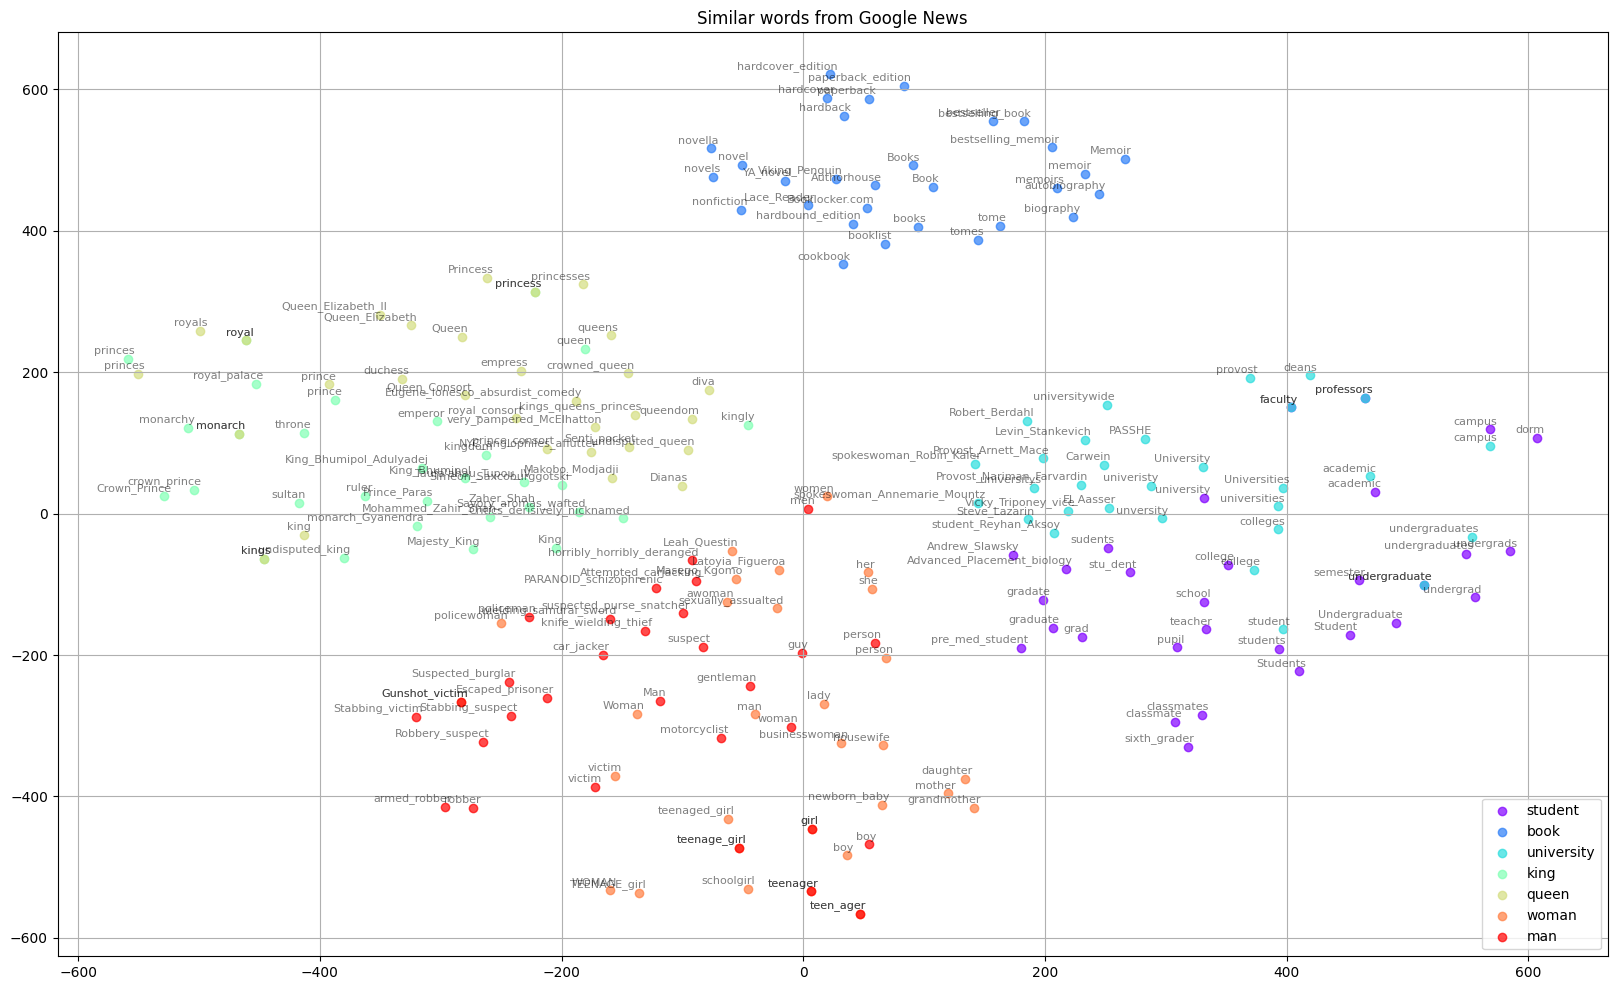

In [7]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32, n_jobs=-1)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    figsize = (9.5,6) if (matplotlib.get_backend() == 'nbAgg') else (20,12)  # interactive plot should be smaller
    plt.figure(figsize=(figsize))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    plt.show()


tsne_plot_similar_words('Similar words from Google News', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')
